In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
accidents = pd.read_csv('data/Accident_Information.csv', engine='python')

In [3]:
accident_df = accidents[['Accident_Index', 'Accident_Severity', 'Junction_Detail', 'Light_Conditions','Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Weather_Conditions']]

In [4]:
null_count = accident_df.isna().sum()
print(null_count)

Accident_Index              0
Accident_Severity           0
Junction_Detail             0
Light_Conditions            0
Road_Surface_Conditions     0
Road_Type                   0
Speed_limit                37
Weather_Conditions          0
dtype: int64


In [5]:
accident_df = accident_df[accident_df['Speed_limit'].notnull()]

In [6]:
accident_df.Accident_Severity.value_counts()

Slight     1734514
Serious     286336
Fatal        26369
Name: Accident_Severity, dtype: int64

In [7]:
encode_df = accident_df.apply(preprocessing.LabelEncoder().fit_transform)

In [8]:
training_size = int(len(encode_df) * 0.80)
training, testing = encode_df[0:training_size], encode_df[training_size:]
encode_df.Accident_Severity.value_counts()

2    1734514
1     286336
0      26369
Name: Accident_Severity, dtype: int64

In [9]:
testing.Accident_Severity.value_counts()

2    339661
1     64743
0      5040
Name: Accident_Severity, dtype: int64

In [10]:
train_labels = training['Accident_Severity'].tolist()
test_labels = testing['Accident_Severity'].tolist()

In [11]:
training = training.drop(columns=['Accident_Severity'])
testing = testing.drop(columns=['Accident_Severity'])
training = training.drop(columns=['Accident_Index'])
testing = testing.drop(columns=['Accident_Index'])
training_np = training.as_matrix()
testing_np = testing.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


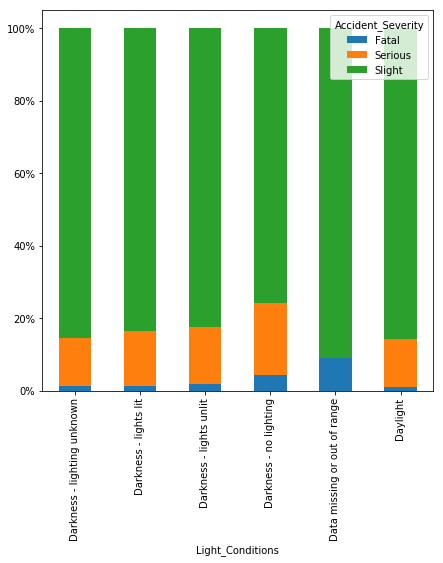

In [12]:
accident_df.groupby(['Light_Conditions','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

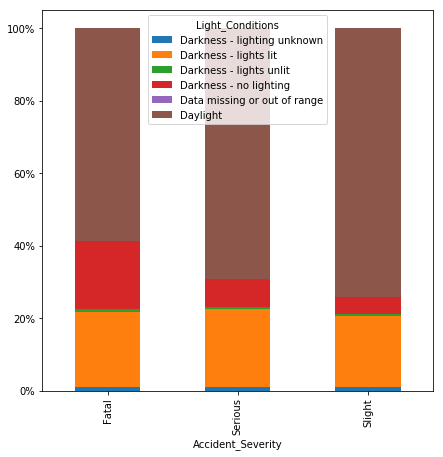

In [13]:
accident_df.groupby(['Accident_Severity','Light_Conditions']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

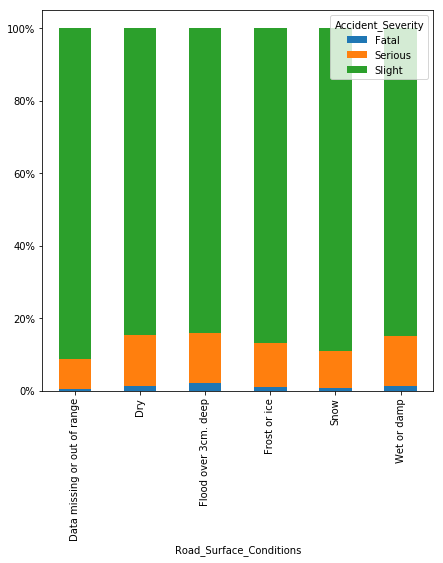

In [14]:
accident_df.groupby(['Road_Surface_Conditions','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

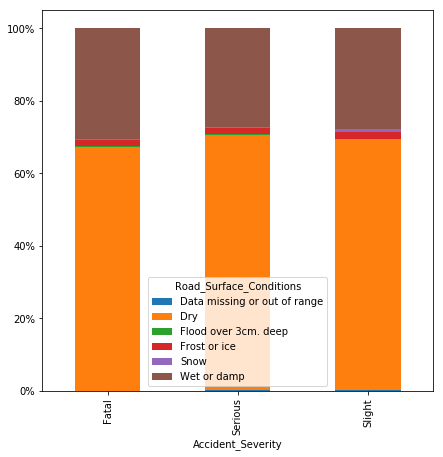

In [15]:
accident_df.groupby(['Accident_Severity','Road_Surface_Conditions']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

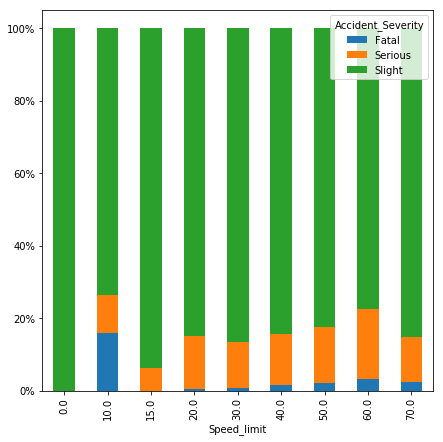

In [16]:
accident_df.groupby(['Speed_limit','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

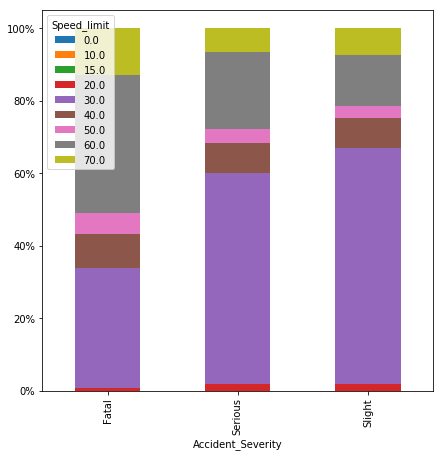

In [17]:
accident_df.groupby(['Accident_Severity','Speed_limit']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

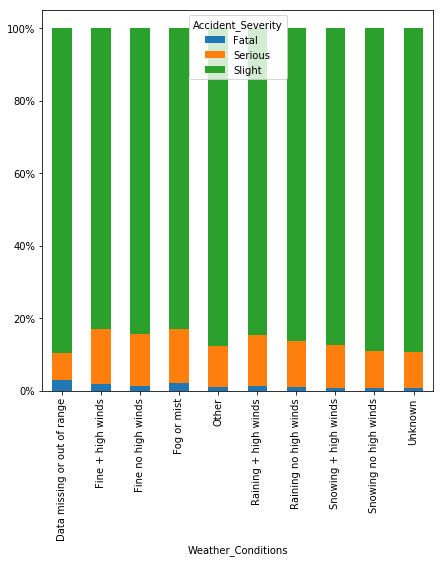

In [18]:
accident_df.groupby(['Weather_Conditions','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

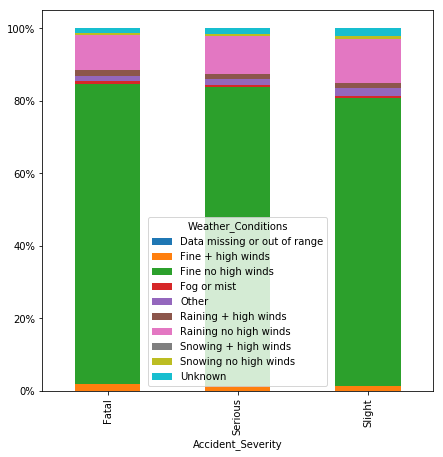

In [19]:
accident_df.groupby(['Accident_Severity','Weather_Conditions']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

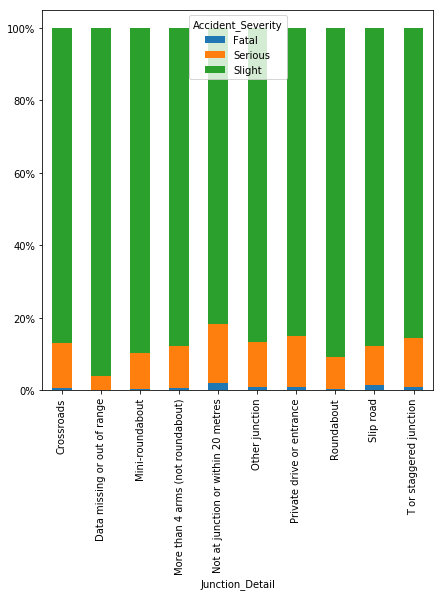

In [20]:
accident_df.groupby(['Junction_Detail','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

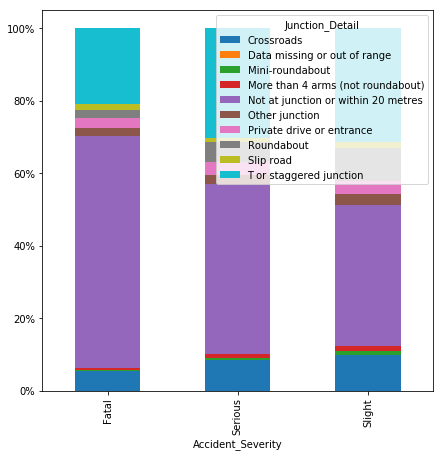

In [21]:
accident_df.groupby(['Accident_Severity','Junction_Detail']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

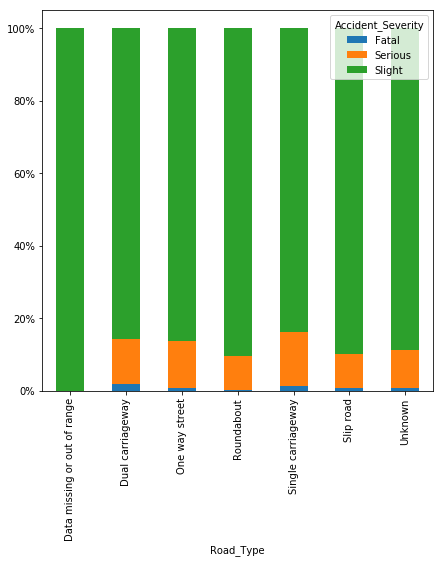

In [22]:
accident_df.groupby(['Road_Type','Accident_Severity']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

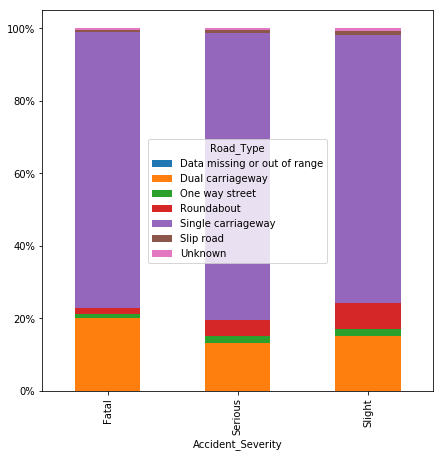

In [23]:
accident_df.groupby(['Accident_Severity','Road_Type']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', figsize = (7,7), stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [24]:
rondom_forest = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=5)
rondom_forest.fit(training_np, train_labels)

rondom_forest_predicted = rondom_forest.predict(testing_np)
rondom_forest_f1 = f1_score(test_labels, rondom_forest_predicted, average='micro') 

print(rondom_forest_f1)
label, counts = np.unique(rondom_forest_predicted, return_counts=True)
dict(zip(label, counts))

0.8291683355965651


{0: 14, 1: 214, 2: 409216}

In [25]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(training_np, train_labels)

ada_predicted = ada.predict(testing_np)
ada_f1 = f1_score(test_labels, ada_predicted, average='micro') 

print(ada_f1)
label, counts = np.unique(ada_predicted, return_counts=True)
dict(zip(label, counts))

0.8295664364357518


{2: 409444}

In [26]:
GradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GradientBoosting.fit(training_np, train_labels)

GradientBoosting_predicted = GradientBoosting.predict(testing_np)
GradientBoosting_f1 = f1_score(test_labels, GradientBoosting_predicted, average='micro') 

print(GradientBoosting_f1)
label, counts = np.unique(GradientBoosting_predicted, return_counts=True)
dict(zip(label, counts))

0.8295664364357518


{2: 409444}

In [27]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(training_np, train_labels)

DecisionTree_predicted = DecisionTree.predict(testing_np)
DecisionTree_f1 = f1_score(test_labels, DecisionTree_predicted, average='micro') 

print(DecisionTree_f1)
label, counts = np.unique(DecisionTree_predicted, return_counts=True)
dict(zip(label, counts))

0.8283574798995711


{0: 34, 1: 629, 2: 408781}

In [28]:
GaussianNB = GaussianNB()
GaussianNB.fit(training_np, train_labels)

GaussianNB_predicted = GaussianNB.predict(testing_np)
GaussianNB_f1 = f1_score(test_labels, GaussianNB_predicted, average='micro') 

print(GaussianNB_f1)
label, counts = np.unique(GaussianNB_predicted, return_counts=True)
dict(zip(label, counts))

0.8295664364357518


{2: 409444}

In [29]:
brf = BalancedRandomForestClassifier(n_estimators=500,max_depth=50,random_state=10)
brf.fit(training_np, train_labels)
brf_predicted = brf.predict(testing_np)

In [30]:
brf_f1 = f1_score(test_labels, brf_predicted, average='micro') 
print(brf_f1)
label, counts = np.unique(brf_predicted, return_counts=True)
dict(zip(label, counts))

0.47241136761071106


{0: 113616, 1: 93737, 2: 202091}

In [31]:
sm = SMOTE(random_state=40)
X_res, y_res = sm.fit_resample(training_np, train_labels)

In [32]:
rondom_forest = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=5)
rondom_forest.fit(X_res, y_res)

rondom_forest_predicted = rondom_forest.predict(testing_np)
rondom_forest_f1 = f1_score(test_labels, rondom_forest_predicted, average='micro') 

print(rondom_forest_f1)
label, counts = np.unique(rondom_forest_predicted, return_counts=True)
dict(zip(label, counts))

0.4711999687380936


{0: 110043, 1: 98461, 2: 200940}